# Introducción a Redes Neuronales 2024 - Trabajo Práctico 1

---




In [1]:
# Importando líbrerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split, Subset

# Configuración de Pandas
pd.set_option('display.max_columns', None)

In [2]:
seed = 27

In [3]:
# Configuración del dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

### Lectura del dataset

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#path_dataset = '/content/drive/MyDrive/Colab Notebooks/Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv' # modifica de ser necesario
path_dataset = '../Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
data = pd.read_csv(path_dataset)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


## 1. EDA

In [5]:
#!pip install ydata-profiling --quiet

In [6]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(data, title="Data Report")
#profile.to_notebook_iframe()

## Preparación de Datos

## 2 Red Nueronal

Implementar una red neuronal simple con parametros por defaults (este será su baseline).

Comentarios:


Es una clasificación binaria. Las funciones de activación pueden ser ReLu para capas ocultas y `sigmoid` o `softmax` para la capa de salida. La funcion de perdida puede ser `BCEWithLogitsLoss`

In [5]:
# Separar X e y
X = data.drop('Diabetes_binary',axis=1).values
y = data['Diabetes_binary'].values # Target

In [6]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

In [7]:
# Escalar los datos los datos, convertirlos a tensores y ajustar la dimensión
scaler = MinMaxScaler()
X_train = torch.Tensor(scaler.fit_transform(X_train))
y_train = torch.LongTensor(y_train).unsqueeze(1).float()

X_val = torch.Tensor(scaler.fit_transform(X_val))
y_val = torch.LongTensor(y_val).unsqueeze(1).float()

X_test = torch.Tensor(scaler.fit_transform(X_val))
y_test = torch.LongTensor(y_test).unsqueeze(1).float()

#X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/

In [8]:
'''
class ClasificadorNN(nn.Module):

    def __init__(self, in_features = 21, hidden_layer_1 = 4, hidden_layer_2=8, out_features = 1):
        super().__init__()
        self.fully_connected_1 = nn.Linear(in_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear( hidden_layer_1,  hidden_layer_2)
        self.output = nn.Linear( hidden_layer_2, out_features)
        #self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = torch.sigmoid(self.output(x)) 
        return x
'''

In [38]:
class ClasificadorNN(nn.Module):
    '''
    Modelo de red neuronal con 3 capas ocultas, con hidden_size neuronas por capa   
    '''
    def __init__(self, n_inputs, n_outputs, n_hidden, activation_function):
        super().__init__()
        self.hidden_layer_1 = nn.Linear(n_inputs, n_hidden)
        self.hidden_layer_2 = nn.Linear(n_hidden, n_hidden)
        self.output_layer = nn.Linear(n_hidden, n_outputs)
        self.activation_function = activation_function

    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = self.hidden_layer_2(x)
        x = self.activation_function(x)
        x = self.output_layer(x)
        return x

### Baseline

In [33]:
torch.manual_seed(seed)
model = ClasificadorNN(21, 4, 8, 1)

lr = 0.1

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model.parameters

<bound method Module.parameters of ClasificadorNN(
  (fully_connected_1): Linear(in_features=21, out_features=4, bias=True)
  (fully_connected_2): Linear(in_features=4, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)>

In [34]:
#epoch = Un entrenamiento sobre todo el dataset
epochs = 100

train_losses = []
val_losses = []

for epoch in tqdm.trange(epochs):
    epoch+=1

    # optimizer.zero_grad() setea todos los gradientes en cero, sino se acumulan
    # y estariamos usando valores de gradiente que ya usamos previamente
    optimizer.zero_grad()
    # Foward pass y obtener la prediccion
    y_pred = model.forward(X_train)

    # Calcular la loss de cada epoca
    loss_train = criterion(y_pred, y_train)

    loss_train.backward()  # backward() calcula los gradientes de las operaciones realizadas
    optimizer.step()  # realiza paso de optimización, actualizando todos los parametros del modelo (pesos y biases)

    train_losses.append(loss_train.item())

    # No queremos imprimir los resultados de las 100 epocas asi que podemos poner una condicion
    if epoch%10 == 1:
       print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

    with torch.no_grad():  # dentro del with impedimos se procesen gradientes para evaluar
        # Foward pass y obtener la prediccion
        y_pred_val = model.forward(X_val)

        # Calcular la loss de cada epoca
        loss_val = criterion(y_pred_val, y_val)
        val_losses.append(loss_val.item())

 11%|█         | 11/100 [00:00<00:00, 103.22it/s]

epoch:  1  loss: 0.69810599
epoch: 11  loss: 0.58415824
epoch: 21  loss: 0.54232806


 44%|████▍     | 44/100 [00:00<00:00, 104.20it/s]

epoch: 31  loss: 0.52021408
epoch: 41  loss: 0.51665711
epoch: 51  loss: 0.51196206


 81%|████████  | 81/100 [00:00<00:00, 116.68it/s]

epoch: 61  loss: 0.50976384
epoch: 71  loss: 0.50799835
epoch: 81  loss: 0.51123273


100%|██████████| 100/100 [00:00<00:00, 107.11it/s]

epoch: 91  loss: 0.50910389


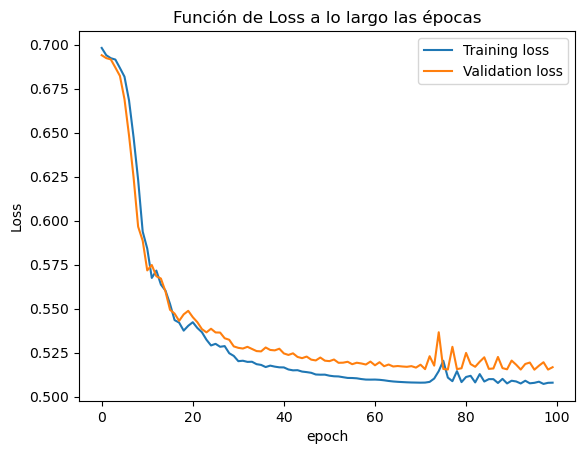

In [35]:
plt.title('Función de Loss a lo largo las épocas')
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [12]:
# Evaluamos el modelo en el conjunto de validación
with torch.no_grad():
    y_pred = model.forward(X_val) #Hacemos una inferencia sobre el conjunto de datos
    loss = criterion(y_pred, y_val)
print(f'Valor de Loss en el conjunto de validación: {loss:.8f}')

Valor de Loss en el conjunto de validación: 0.51678491


In [13]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_val):
        y_pred = model.forward(data)

        # Mientras más alto es el valor más alta es la probabilidad de que pertenezca a la clase
        print(f'Ejemplo {i+1:2}.) {str(y_pred):38}  {y_val[i]}')

        if y_pred.argmax().item() == y_val[i]:
            correct += 1
print(f'\n{correct} out of {len(y_val)} = {100*correct/len(y_val):.2f}% correct')

Ejemplo  1.) tensor([0.1760])                        tensor([0.])
Ejemplo  2.) tensor([0.4196])                        tensor([0.])
Ejemplo  3.) tensor([0.0404])                        tensor([0.])
Ejemplo  4.) tensor([0.2519])                        tensor([0.])
Ejemplo  5.) tensor([0.8276])                        tensor([1.])
Ejemplo  6.) tensor([0.0680])                        tensor([0.])
Ejemplo  7.) tensor([0.4108])                        tensor([0.])
Ejemplo  8.) tensor([0.7383])                        tensor([1.])
Ejemplo  9.) tensor([0.8159])                        tensor([1.])
Ejemplo 10.) tensor([0.8429])                        tensor([0.])
Ejemplo 11.) tensor([0.3096])                        tensor([0.])
Ejemplo 12.) tensor([0.8687])                        tensor([1.])
Ejemplo 13.) tensor([0.2952])                        tensor([0.])
Ejemplo 14.) tensor([0.8732])                        tensor([1.])
Ejemplo 15.) tensor([0.4207])                        tensor([1.])
Ejemplo 16

### Prueba 1

In [112]:
torch.manual_seed(seed)
model = ClasificadorNN(21, 21, 7, 1)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
model.parameters

<bound method Module.parameters of ClasificadorNN(
  (fully_connected_1): Linear(in_features=21, out_features=21, bias=True)
  (fully_connected_2): Linear(in_features=21, out_features=7, bias=True)
  (output): Linear(in_features=7, out_features=1, bias=True)
)>

In [113]:
#epoch = Un entrenamiento sobre todo el dataset
epochs = 100

train_losses = []
val_losses = []

for epoch in tqdm.trange(epochs):
    epoch+=1

    # optimizer.zero_grad() setea todos los gradientes en cero, sino se acumulan
    # y estariamos usando valores de gradiente que ya usamos previamente
    optimizer.zero_grad()
    # Foward pass y obtener la prediccion
    y_pred = model.forward(X_train)

    # Calcular la loss de cada epoca
    loss_train = criterion(y_pred, y_train)

    loss_train.backward()  # backward() calcula los gradientes de las operaciones realizadas
    optimizer.step()  # realiza paso de optimización, actualizando todos los parametros del modelo (pesos y biases)

    train_losses.append(loss_train.item())

    # No queremos imprimir los resultados de las 100 epocas asi que podemos poner una condicion
    if epoch%10 == 1:
       print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

    with torch.no_grad():  # dentro del with impedimos se procesen gradientes para evaluar
        # Foward pass y obtener la prediccion
        y_pred_val = model.forward(X_val)

        # Calcular la loss de cada epoca
        loss_val = criterion(y_pred_val, y_val)
        val_losses.append(loss_val.item())

  9%|▉         | 9/100 [00:00<00:02, 41.55it/s]

epoch:  1  loss: 0.69155878


 19%|█▉        | 19/100 [00:00<00:02, 40.07it/s]

epoch: 11  loss: 0.66705161


 29%|██▉       | 29/100 [00:00<00:01, 40.89it/s]

epoch: 21  loss: 0.59575135


 39%|███▉      | 39/100 [00:00<00:01, 40.85it/s]

epoch: 31  loss: 0.55931437


 49%|████▉     | 49/100 [00:01<00:01, 41.39it/s]

epoch: 41  loss: 0.53991759


 59%|█████▉    | 59/100 [00:01<00:00, 42.48it/s]

epoch: 51  loss: 0.52658492


 69%|██████▉   | 69/100 [00:01<00:00, 43.53it/s]

epoch: 61  loss: 0.51914972


 74%|███████▍  | 74/100 [00:01<00:00, 41.60it/s]

epoch: 71  loss: 0.51400763


 89%|████████▉ | 89/100 [00:02<00:00, 40.89it/s]

epoch: 81  loss: 0.51048696


 99%|█████████▉| 99/100 [00:02<00:00, 41.31it/s]

epoch: 91  loss: 0.50835192


100%|██████████| 100/100 [00:02<00:00, 40.79it/s]


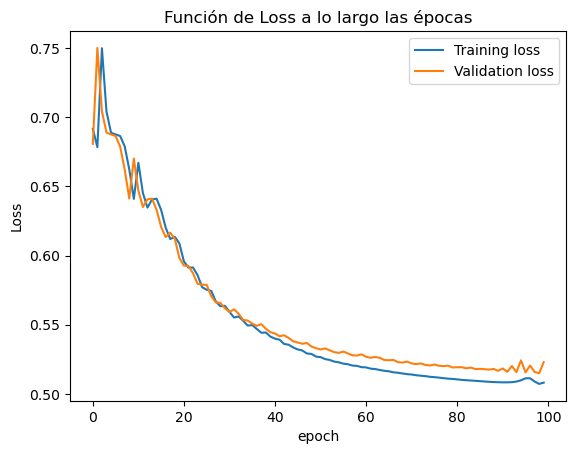

In [114]:
plt.title('Función de Loss a lo largo las épocas')
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

### Prueba 2


In [125]:
torch.manual_seed(seed)
model = ClasificadorNN(21, 4, 8, 1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
model.parameters

<bound method Module.parameters of ClasificadorNN(
  (fully_connected_1): Linear(in_features=21, out_features=4, bias=True)
  (fully_connected_2): Linear(in_features=4, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)>

In [126]:
#epoch = Un entrenamiento sobre todo el dataset
epochs = 100

train_losses = []
val_losses = []

for epoch in tqdm.trange(epochs):
    epoch+=1

    # optimizer.zero_grad() setea todos los gradientes en cero, sino se acumulan
    # y estariamos usando valores de gradiente que ya usamos previamente
    optimizer.zero_grad()
    # Foward pass y obtener la prediccion
    y_pred = model.forward(X_train)

    # Calcular la loss de cada epoca
    loss_train = criterion(y_pred, y_train)

    loss_train.backward()  # backward() calcula los gradientes de las operaciones realizadas
    optimizer.step()  # realiza paso de optimización, actualizando todos los parametros del modelo (pesos y biases)

    train_losses.append(loss_train.item())

    # No queremos imprimir los resultados de las 100 epocas asi que podemos poner una condicion
    if epoch%10 == 1:
       print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

    with torch.no_grad():  # dentro del with impedimos se procesen gradientes para evaluar
        # Foward pass y obtener la prediccion
        y_pred_val = model.forward(X_val)

        # Calcular la loss de cada epoca
        loss_val = criterion(y_pred_val, y_val)
        val_losses.append(loss_val.item())

 13%|█▎        | 13/100 [00:00<00:00, 123.03it/s]

epoch:  1  loss: 0.69810599
epoch: 11  loss: 0.69700718
epoch: 21  loss: 0.69623172


 53%|█████▎    | 53/100 [00:00<00:00, 123.89it/s]

epoch: 31  loss: 0.69564593
epoch: 41  loss: 0.69518578
epoch: 51  loss: 0.69482100


 79%|███████▉  | 79/100 [00:00<00:00, 120.36it/s]

epoch: 61  loss: 0.69453019
epoch: 71  loss: 0.69429594
epoch: 81  loss: 0.69410598


100%|██████████| 100/100 [00:00<00:00, 119.55it/s]

epoch: 91  loss: 0.69395190


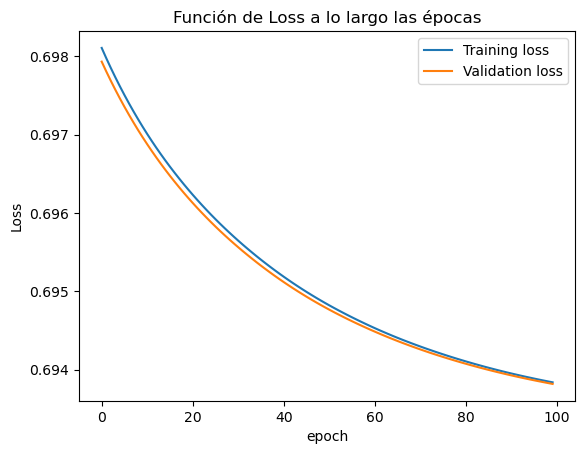

In [127]:
plt.title('Función de Loss a lo largo las épocas')
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [133]:
class BigMLP(nn.Module):
    def __init__(self, n_inputs, n_outputs, n_hidden, activation_function):
        super().__init__()
        self.hidden_layer1 = nn.Linear(n_inputs, n_hidden*2)
        self.hidden_layer2 = nn.Linear(n_hidden*2, n_hidden*4)
        self.hidden_layer3 = nn.Linear(n_hidden*4, n_hidden*8)
        self.hidden_layer4 = nn.Linear(n_hidden*8, n_hidden)
        self.output_layer = nn.Linear(n_hidden, n_outputs)
        self.activation_function = activation_function

    def forward(self, x: torch.Tensor):
        x = self.activation_function(self.hidden_layer1(x))
        x = self.activation_function(self.hidden_layer2(x))
        x = self.activation_function(self.hidden_layer3(x))
        x = self.activation_function(self.hidden_layer4(x))
        x = self.output_layer(x)  # Output Layer
        return x

In [134]:
EPOCHS = 25
experiments = []

activation_functions = {
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'ReLU': nn.ReLU(),
    'LeakyReLU': nn.LeakyReLU()
}

# Define model parameters
n_inputs = 21
n_outputs = 1
n_hidden = 128
# Define the activation function
activation_function = nn.ReLU()
# Define the loss function
loss_function = nn.CrossEntropyLoss()
# Define parameters of the optimizer
lr = 0.001
momentum = 0.9

In [135]:
model = BigMLP(n_inputs, n_outputs, n_hidden, activation_function)
# Instantiate optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)
print(f'Model: {model}')

Model: BigMLP(
  (hidden_layer1): Linear(in_features=21, out_features=256, bias=True)
  (hidden_layer2): Linear(in_features=256, out_features=512, bias=True)
  (hidden_layer3): Linear(in_features=512, out_features=1024, bias=True)
  (hidden_layer4): Linear(in_features=1024, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=1, bias=True)
  (activation_function): ReLU()
)


In [136]:
#epoch = Un entrenamiento sobre todo el dataset
epochs = 100

train_losses = []
val_losses = []

for epoch in tqdm.trange(epochs):
    epoch+=1

    # optimizer.zero_grad() setea todos los gradientes en cero, sino se acumulan
    # y estariamos usando valores de gradiente que ya usamos previamente
    optimizer.zero_grad()
    # Foward pass y obtener la prediccion
    y_pred = model.forward(X_train)

    # Calcular la loss de cada epoca
    loss_train = criterion(y_pred, y_train)

    loss_train.backward()  # backward() calcula los gradientes de las operaciones realizadas
    optimizer.step()  # realiza paso de optimización, actualizando todos los parametros del modelo (pesos y biases)

    train_losses.append(loss_train.item())

    # No queremos imprimir los resultados de las 100 epocas asi que podemos poner una condicion
    if epoch%10 == 1:
       print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

    with torch.no_grad():  # dentro del with impedimos se procesen gradientes para evaluar
        # Foward pass y obtener la prediccion
        y_pred_val = model.forward(X_val)

        # Calcular la loss de cada epoca
        loss_val = criterion(y_pred_val, y_val)
        val_losses.append(loss_val.item())

  0%|          | 0/100 [00:00<?, ?it/s]


RuntimeError: all elements of input should be between 0 and 1